# Tarea 1: Cuarentenas por Región 

In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
import datetime 
import warnings
from datetime import datetime, timedelta

### Función ordenada: 
#### Entrada: El DataFrame de entrada debe tener columnas llamadas 'inicio' y 'termino' las cuales hacen referencia a los períodos de cuarentena por comunas.
#### retorna un DataFrame de fechas y poblacion total (ordenado por fecha)

In [349]:
def ordenada(df):
    lista = []
    lista_df =[]
    for i in range(len(df)):
        lista.append(df.iloc[i:(i+1)])
    for i in range(len(df)):
        inicio = lista[i]['inicio'].min()
        fin = lista[i]['termino'].max()
        lista_fechas = [inicio+timedelta(days =d)for d in range((fin-inicio).days+1)]
        fechas = pd.DataFrame(lista_fechas, columns=['fecha'])
        codigos = pd.DataFrame(df['codigo_comuna'].iloc[i].repeat(len(lista_fechas)),
                              columns=['codigo_comuna'])
        lista_df.append(pd.concat([fechas,codigos], axis=1))
    region = pd.concat(lista_df,axis=0)
    datos = region.merge(df,on='codigo_comuna')
    datos1 = datos[['fecha','poblacion']].sort_values('fecha', ascending = True)
    g = datos1.groupby('fecha').sum()
    colores = ["#67E568","#257F27","#08420D","#FFF000","#FFB62B","#E56124","#E53E30","#7F2353","#F911FF","#9F8CA6"]
    return  g

###  Función gráfico: 

#### Entrada: El DataFrame de entrada debe tener columnas llamadas 'inicio' y 'termino' las cuales hacen referencia a los períodos de cuarentena por comunas.
#### retorna el gráfico de población v/s fecha del DataFrame indicado

In [350]:
def grafico(df):
    g = ordenada(df)
    colores = ["#67E568","#257F27","#08420D","#FFF000","#FFB62B","#E56124","#E53E30","#7F2353","#F911FF","#9F8CA6"]
    return  sns.lineplot(x='fecha',y='poblacion', data=g,color=np.random.choice(colores))

###  Guardamos el URL de las bases de datos que utilizaremos:

In [351]:
# Función que accede a los archivos y arma un dataframe adecuado
cuarentenas='https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto29/Cuarentenas-Totales.csv?raw=true'
covid='https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true'

### Función Base: 
#### Entrada: Ingresar 2 Link con bases de datos
#### Link1: Debe contener las columnas 'Nombre','Fecha de Inicio', 'Fecha de Término', 'Código CUT Comuna', 'Region'
#### Link2: Debe contener las columnas 'Region','Codigo region','Comuna','Codigo comuna','Poblacion'
#### retorna un DataFrame combinando las columnas anteriores.

In [352]:
def base(link1,link2):
    b1 = pd.read_csv(link1, sep=',')
    b2 = pd.read_csv(link2, sep=',')
    b11 = b1[['Nombre','Fecha de Inicio', 'Fecha de Término', 'Código CUT Comuna',
          'Region']].dropna()
    # Cambiamos los nombres de las columnas
    b11 = b11.rename(columns={'Nombre':'comuna','Fecha de Inicio': 'inicio', 
                    'Fecha de Término': 'termino','Código CUT Comuna':'codigo_comuna',
                   'Region':'num_region'})
    # Seleccionamos solo las columnas de interés y Eliminamos las filas NA's
    b22 = b2[['Region','Codigo region','Comuna','Codigo comuna','Poblacion']].dropna()
    # Cambiamos los nombres de las columnas
    b22 = b22.rename(columns={'Region':'region','Codigo region':'num_region',
                          'Comuna':'comuna','Codigo comuna':'codigo_comuna',
                          'Poblacion':'poblacion'})
    b22['codigo_comuna'] = b22['codigo_comuna'].astype(int)
    datos = b11.merge(b22, on='codigo_comuna')
    datos1 = datos[['comuna_x','inicio','termino','codigo_comuna','num_region_x',
                'region','poblacion']]
    datos1['inicio'] = datos1['inicio'].apply(lambda a: a[0:10])
    datos1['termino'] = datos1['termino'].apply(lambda a: a[0:10])
    datos1['inicio'] = pd.to_datetime(datos1['inicio'], format = '%Y/%m/%d')
    datos1['termino'] = pd.to_datetime(datos1['termino'], format = '%Y/%m/%d')
    warnings.warn('Do not show this message')
    return datos1
    

In [353]:
final = base(cuarentenas,covid)
final.head(5)

,comuna_x,inicio,termino,codigo_comuna,num_region_x,region,poblacion
0,Arica,2020-04-16,2020-05-15,15101,15,Arica y Parinacota,247552.0
1,Arica Re-Ingreso urbano,2020-07-14,2020-11-09,15101,15,Arica y Parinacota,247552.0
2,Santiago Norte,2020-04-13,2020-05-05,13101,13,Metropolitana,503147.0
3,Santiago,2020-03-26,2020-04-13,13101,13,Metropolitana,503147.0
4,Santiago Extensión a Total,2020-05-05,2020-08-17,13101,13,Metropolitana,503147.0


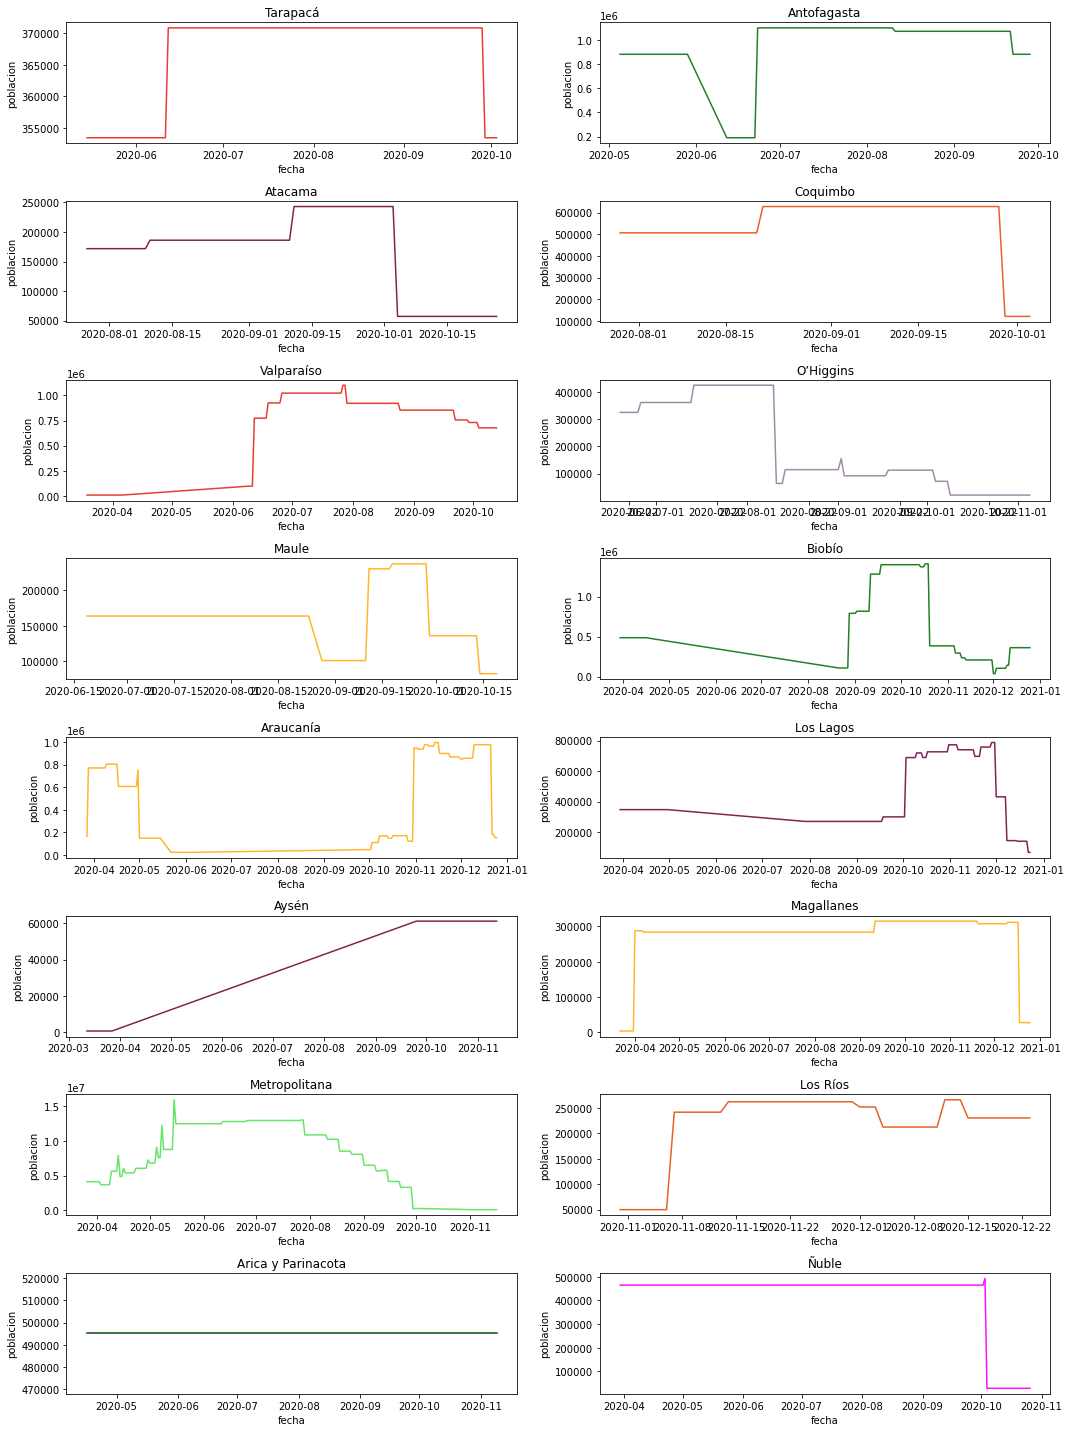

In [354]:
# Guardamos en una lista un DataFrame por región de manera ordenada creciente (1 a 16)

region=[]
for i in range(1,17):
    region.append(final[final.num_region_x == i].sort_values('inicio', ascending=True))

# Graficamos cada región en distintos plots
# Extraemos los nombres unicos de las regiones y ordenamos de manera creciente
nombres = final.sort_values('num_region_x', ascending=True)['region'].unique()

for i in range(len(region)):
    plt.rcParams["figure.figsize"] = [15, 20]
    plt.subplot(8,2,i+1)
    grafico(region[i])
    plt.title(nombres[i])

plt.show()

## ¿Que dia hubo más personas en cuarentena a nivel nacional?

In [355]:
lista=[]
for i in range(16):
    lista.append(ordenada(region[i]))
total=pd.concat(lista,axis=0).sort_values("fecha",ascending=True)

In [356]:
#Medidas descriptivas
total.describe()

,poblacion
count,2.054000e+03
mean,1.231921e+06
std,2.756185e+06
min,5.720000e+02
25%,1.860780e+05
50%,3.708570e+05
75%,7.907570e+05
max,1.591164e+07


In [357]:
#día que hubo más personas en cuarentena a nivel nacional
total[total.poblacion==total.poblacion.max()]

,poblacion
fecha,
2020-05-15,15911638.0


## El día que hubo más personas en cuarentena a nivel nacional fue el 15-05-2020 con un total de 15.911.638 de personas. 

# ¿Que dia hubo más personas en cuarentena por región?

In [359]:
def dias_max_region (n):
    regn=ordenada(region[n])
    return  regn[regn.poblacion==regn.poblacion.max()]

### Región de Tarapacá  (I región)

In [370]:
# Se observa que en la region de Tarapacá desde el 12-06-2020 hasta el 28-09-2020 estuvo con el max de personas en cuarentena
#Tambien se observa en su respectivo grafico, como una linea constante entre dichas fechas.
#dicha cuarentena duro 109 dias.
dias_max_region(0)

,poblacion
fecha,
2020-06-12,370857.0
2020-06-13,370857.0
2020-06-14,370857.0
2020-06-15,370857.0
2020-06-16,370857.0
...,...
2020-09-24,370857.0
2020-09-25,370857.0
2020-09-26,370857.0


### Región de Antofagasta (II Región)

In [376]:
# Se observa que en la region de Antofagasta desde el 23-06-2020 hasta el 10-08-2020 estuvo con el max de personas en cuarentena
#Tambien se observa en su respectivo grafico, como una linea constante entre dichas fechas.
#dicha cuarentena duro 49 dias.
dias_max_region(1)

,poblacion
fecha,
2020-06-23,1099417.0
2020-06-24,1099417.0
2020-06-25,1099417.0
2020-06-26,1099417.0
2020-06-27,1099417.0
2020-06-28,1099417.0
2020-06-29,1099417.0
2020-06-30,1099417.0
2020-07-01,1099417.0


### Región de Atacama (III Región)

In [393]:
# Se observa que en la region de Atacama desde el 11-09-2020 hasta el 03-10-2020 estuvo con el max de personas en cuarentena
#Tambien se observa en su respectivo grafico, como una linea constante entre dichas fechas.
#dicha cuarentena duro 23 dias.
dias_max_region(2)

,poblacion
fecha,
2020-09-11,243087.0
2020-09-12,243087.0
2020-09-13,243087.0
2020-09-14,243087.0
2020-09-15,243087.0
2020-09-16,243087.0
2020-09-17,243087.0
2020-09-18,243087.0
2020-09-19,243087.0


### Región de Coquimbo (IV Región)

In [395]:
# Se observa que en la region de Coquimbo desde el 21-08-2020 hasta el 28-09-2020 estuvo con el max de personas en cuarentena
#Tambien se observa en su respectivo grafico, como una linea constante entre dichas fechas.
#dicha cuarentena duro 39 dias.
dias_max_region(3)

,poblacion
fecha,
2020-08-21,627660.0
2020-08-22,627660.0
2020-08-23,627660.0
2020-08-24,627660.0
2020-08-25,627660.0
2020-08-26,627660.0
2020-08-27,627660.0
2020-08-28,627660.0
2020-08-29,627660.0


### Región de Valparaiso (V Región)

In [379]:
# Se observa que en la región de Valparaiso tuvo su peak de personas en cuarentena solo 2 dias
# el día 27-07-2020 y el día 28-07-2020
dias_max_region(4)

,poblacion
fecha,
2020-07-27,1101935.0
2020-07-28,1101935.0


### Región de O'Higgins (VI Región)

In [397]:
# Se observa que en la región de O´higgins desde el 14-07-2020 hasta el 10-08-2020 estuvo con el max de personas en cuarentena
#Tambien se observa en su respectivo grafico, como una linea constante entre dichas fechas.
#dicha cuarentena duro 28 dias.
dias_max_region(5)

,poblacion
fecha,
2020-07-14,425338.0
2020-07-15,425338.0
2020-07-16,425338.0
2020-07-17,425338.0
2020-07-18,425338.0
2020-07-19,425338.0
2020-07-20,425338.0
2020-07-21,425338.0
2020-07-22,425338.0


### Región del Maule (VII Región)

In [399]:
# Se observa que en la región del Maule desde el 18-09-2020 hasta el 28-09-2020 estuvo con el max de personas en cuarentena
#Tambien se observa en su respectivo grafico, como una linea constante entre dichas fechas.
#dicha cuarentena duro 11 dias.
dias_max_region(6)

,poblacion
fecha,
2020-09-18,236964.0
2020-09-19,236964.0
2020-09-20,236964.0
2020-09-21,236964.0
2020-09-22,236964.0
2020-09-23,236964.0
2020-09-24,236964.0
2020-09-25,236964.0
2020-09-26,236964.0


### Región del BioBio (VIII Región)

In [382]:
# Se observa que en la región del Bio Bio tuvo su peak de personas en cuarentena solo 3 dias
# desde el día 17-10-2020 hasta el día 19-10-2020
dias_max_region(7)

,poblacion
fecha,
2020-10-17,1408559.0
2020-10-18,1408559.0
2020-10-19,1408559.0


### Región de la Araucanía (IX Región) 

In [383]:
# Se observa que en la región de la araucanía tuvo su peak de personas en cuarentena solo 3 dias
# desde el día 14-11-2020 hasta el día 16-11-2020
dias_max_region(8)

,poblacion
fecha,
2020-11-14,995917.0
2020-11-15,995917.0
2020-11-16,995917.0


### Región de los lagos (X Región) 

In [384]:
# Se observa que en la región de los lagos tuvo su peak de personas en cuarentena solo 3 dias
# desde el día 28-11-2020 hasta el día 30-11-2020
dias_max_region(9)

,poblacion
fecha,
2020-11-28,787090.0
2020-11-29,787090.0
2020-11-30,787090.0


### Región Aysén del General Carlos Ibañez del Campo (XI Región)

In [401]:
# Se observa que en la región de Aysén desde el 25-09-2020 hasta el 12-11-2020 estuvo con el max de personas en cuarentena
#Tambien se observa en su respectivo grafico, como una linea constante entre dichas fechas.
#dicha cuarentena duro 49 dias.
dias_max_region(10)

,poblacion
fecha,
2020-09-25,61210.0
2020-09-26,61210.0
2020-09-27,61210.0
2020-09-28,61210.0
2020-09-29,61210.0
2020-09-30,61210.0
2020-10-01,61210.0
2020-10-02,61210.0
2020-10-03,61210.0


### Región de Magallanes (XII Región) 

In [403]:
# Se observa que en la región de Magallanes desde el 11-09-2020 hasta el 19-11-2020 estuvo con el max de personas en cuarentena
#Tambien se observa en su respectivo grafico, como una linea constante entre dichas fechas.
#dicha cuarentena duro 70 dias.
dias_max_region(11)

,poblacion
fecha,
2020-09-11,315073.0
2020-09-12,315073.0
2020-09-13,315073.0
2020-09-14,315073.0
2020-09-15,315073.0
...,...
2020-11-15,315073.0
2020-11-16,315073.0
2020-11-17,315073.0


### Región Metropolitana de Santiago de Chile (XIII Región)

In [387]:
# Se observa que en la región Metropolitana tuvo su peak de personas en cuarentena solo 1 dia
# dicho día corresponde al 15-05-2020
dias_max_region(12)

,poblacion
fecha,
2020-05-15,15911638.0


### Región de los ríos (XIV Región)

In [388]:
# Se observa que en la región de los ríos tuvo su peak de personas en cuarentena solo 3 dias
# desde el día 12-12-2020 hasta el día 14-12-2020
dias_max_region(13)

,poblacion
fecha,
2020-12-12,266276.0
2020-12-13,266276.0
2020-12-14,266276.0


### Región de Arica y Parinacota (XV Región)

In [405]:
# Se observa que en la región de Arica y parinacota desde el 16-04-2020 hasta el 09-11-2020 estuvo en cuarentena
#Tambien se observa en su respectivo grafico, como una linea constante entre dichas fechas.
#dicha cuarentena duro 149 dias.
dias_max_region(14)

,poblacion
fecha,
2020-04-16,495104.0
2020-04-17,495104.0
2020-04-18,495104.0
2020-04-19,495104.0
2020-04-20,495104.0
...,...
2020-11-05,495104.0
2020-11-06,495104.0
2020-11-07,495104.0


### Región de Ñuble (XVI Región)

In [390]:
# Se observa que en la región de Ñuble tuvo su peak de personas en cuarentena solo 1 dia
# dicho día corresponde al 03-10-2020
dias_max_region(15)

,poblacion
fecha,
2020-10-03,493277.0
